In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon


%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#Reading in dataframe
df = pd.read_csv('../data/nyc_taxi_records.csv')

#Setting the req_index column as the index
df.set_index('req_index', inplace=True)

#Converting the index to datetime
df.index = pd.to_datetime(df.index, format= '%Y-%m-%d')

#Checking the dtypes
df.dtypes

PULocationID            float64
DOLocationID            float64
trip_miles              float64
base_passenger_fare     float64
tips                    float64
driver_pay              float64
congestion_surcharge    float64
req_time                 object
req_date                 object
pickup_time              object
dropoff_date             object
dropoff_time             object
temp                    float64
preciptype                int64
zone                     object
borough                   int64
tips_driver_pay         float64
trip_duration             int64
month                     int64
day                       int64
borough_name             object
dtype: object

In [3]:
#Creating a df by week
df_weekly = df['tips_driver_pay'].resample('W').mean()
by_week = pd.DataFrame(df_weekly)

#by_day
by_day = df['tips_driver_pay'].resample("D").mean()
by_day = pd.DataFrame(by_day)

#by_month
by_month = df['tips_driver_pay'].resample("ME").mean()
by_month = pd.DataFrame(by_month)

In [4]:
df_weekly.head()

req_index
2022-01-09    16.237668
2022-01-16    16.737110
2022-01-23    16.012501
2022-01-30    17.151339
2022-02-06    17.283332
Freq: W-SUN, Name: tips_driver_pay, dtype: float64

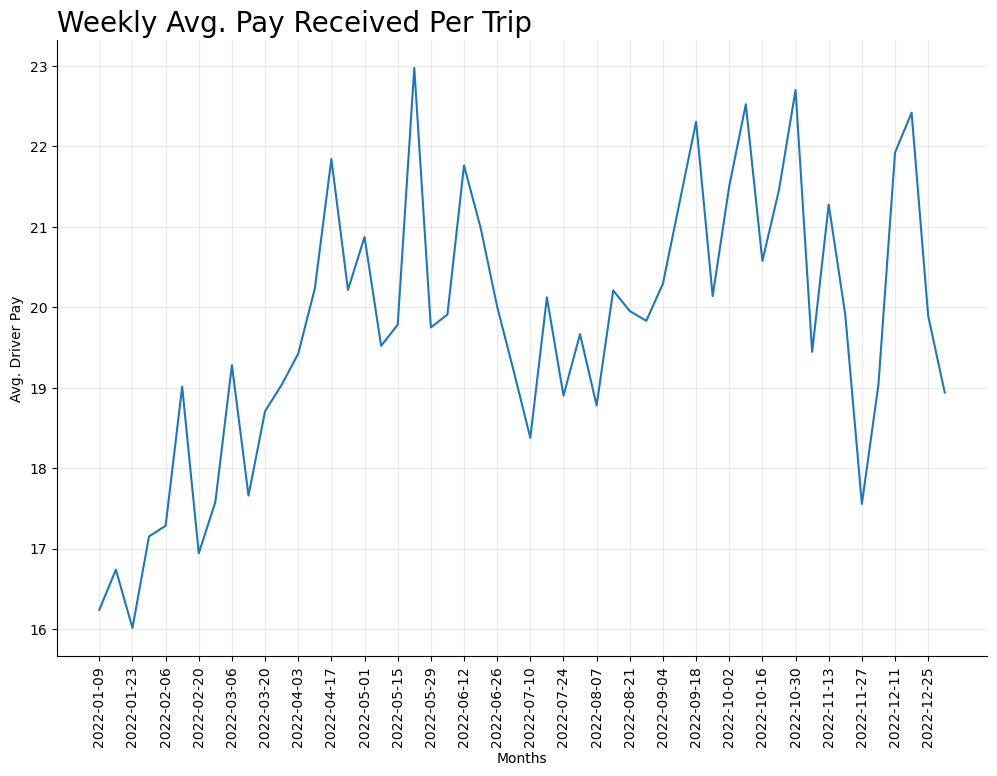

In [5]:
#Creating a Time Series of Weekly Avg. Driver Pay Per Trip

plt.figure(figsize=(12,8))
plt.plot(df.resample('W')['tips_driver_pay'].mean().dropna());
plt.ylabel("Avg. Driver Pay")
plt.xlabel("Months")
plt.title("Weekly Avg. Pay Received Per Trip", loc='left', fontsize=20);
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True)
plt.xticks(df_weekly.index[::2], rotation=90);

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_11224/1044578933.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample('M')['tips_driver_pay'].mean().dropna(), color='orange', label='Monthly Avg.');
/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_11224/1044578933.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample('2M')['tips_driver_pay'].mean().dropna(), color='red', label='Bi-monthly Avg.');


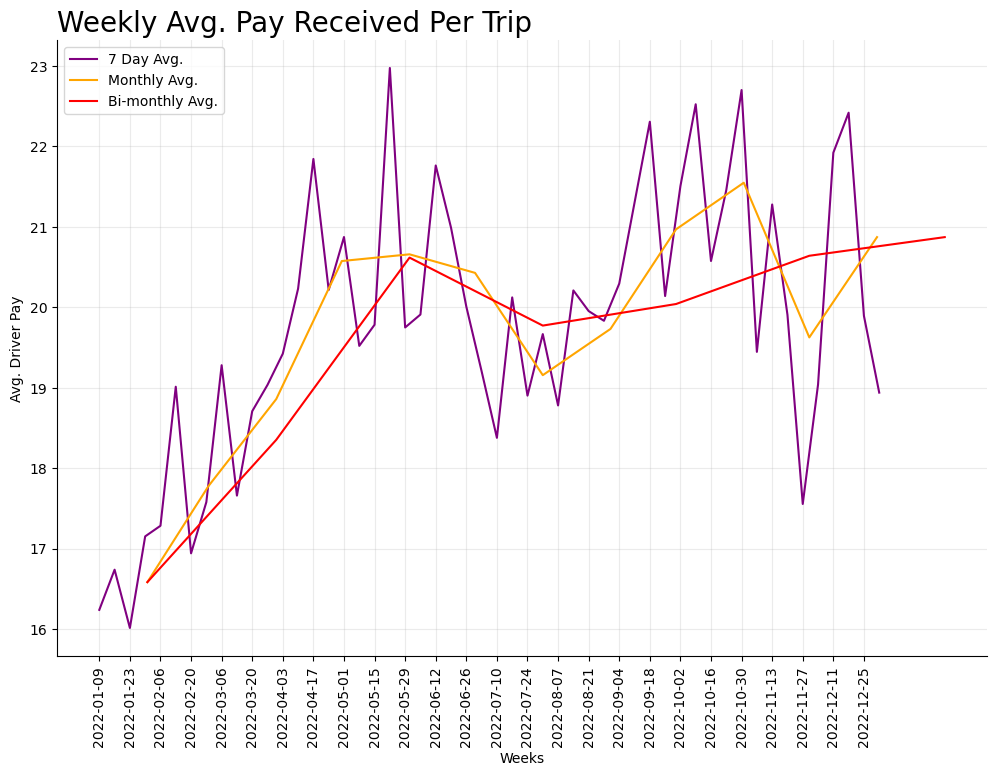

In [6]:
#Creating a Time Series of Weekly Avg. Driver Pay Per Trip

plt.figure(figsize=(12,8))
plt.plot(df.resample('W')['tips_driver_pay'].mean().dropna(), color='purple', label='7 Day Avg.');
plt.plot(df.resample('M')['tips_driver_pay'].mean().dropna(), color='orange', label='Monthly Avg.');
plt.plot(df.resample('2M')['tips_driver_pay'].mean().dropna(), color='red', label='Bi-monthly Avg.');
plt.ylabel("Avg. Driver Pay")
plt.xlabel("Weeks")
plt.title("Weekly Avg. Pay Received Per Trip", loc='left', fontsize=20);
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True)
plt.xticks(df_weekly.index[::2], rotation=90);
plt.legend();

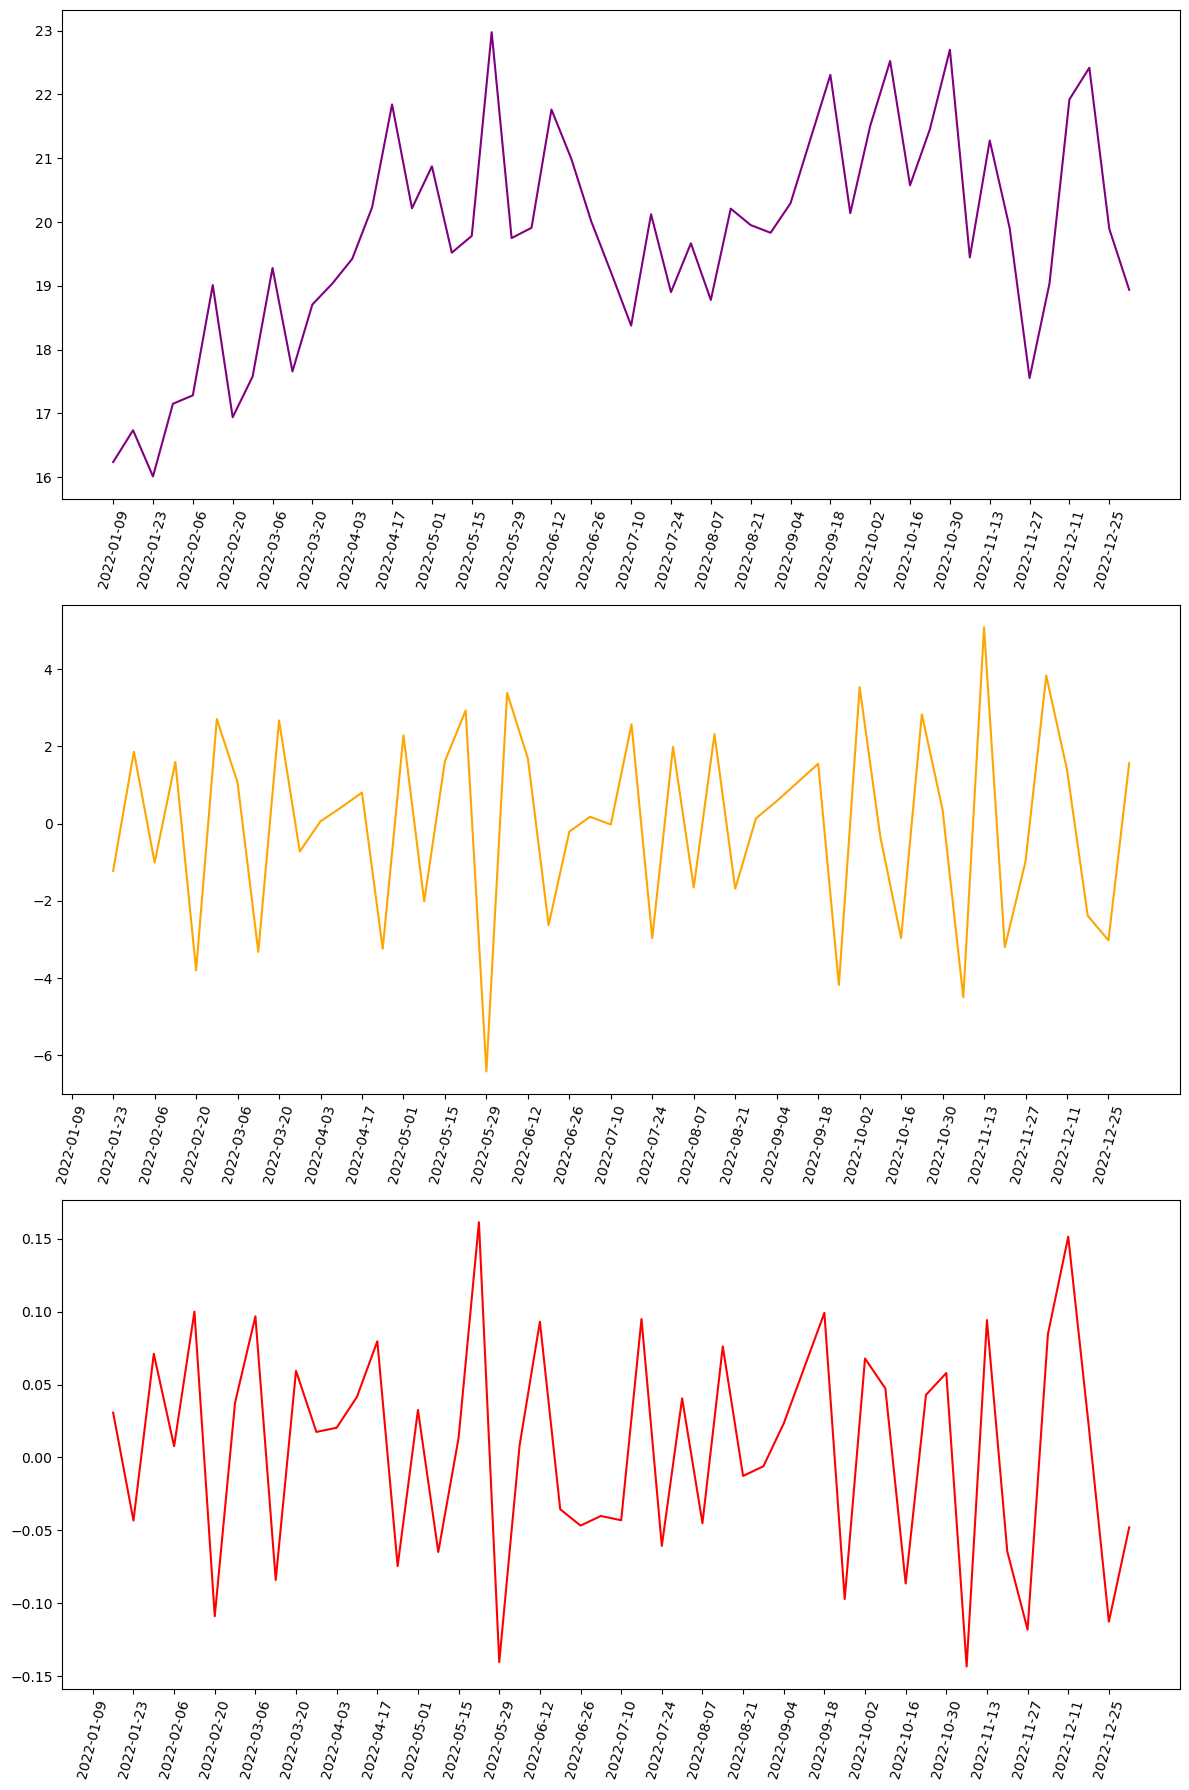

In [7]:
#Creating a stationary time series graph to see if there is seasonality by week
fig, axs = plt.subplots(3, 1, figsize=(12,18))
axs[0].plot(df.resample('W')['tips_driver_pay'].mean().dropna(), color='purple')
axs[0].set_xticks(df_weekly.index[::2]);
axs[0].tick_params(axis='x', rotation=75);
axs[1].plot(df.resample('W')['tips_driver_pay'].mean().dropna().diff().diff(), color='orange')
axs[1].set_xticks(df_weekly.index[::2]);
axs[1].tick_params(axis='x', rotation=75);
axs[2].plot(df.resample('W')['tips_driver_pay'].mean().dropna().pct_change(), color='red');
axs[2].set_xticks(df_weekly.index[::2]);
axs[2].tick_params(axis='x', rotation=75);
plt.tight_layout()

In [90]:
#building a dataset to build a machine learning model later ona
new_df = pd.DataFrame()

#creating columns to predict pay a drive will receive on a given day
new_df['Y'] = df['tips_driver_pay']
new_df['last_value'] = df['tips_driver_pay'].shift()
new_df['diff'] = df['tips_driver_pay'].diff().shift()

#Creating a column of the rolling average of the previous 4 days
new_df['mean_4'] = df['tips_driver_pay'].dropna().rolling(4).mean().shift()
new_df.head()

,Y,last_value,diff
req_index,,,
2022-01-04,17.08,NaN,NaN
2022-01-04,7.68,17.08,NaN
2022-01-04,9.85,7.68,-9.40
2022-01-04,5.47,9.85,2.17
2022-01-04,16.33,5.47,-4.38


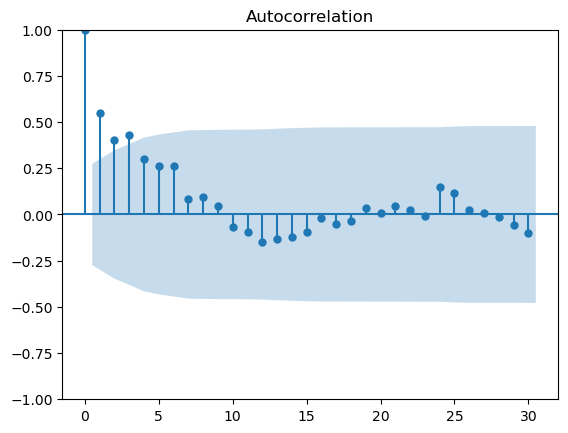

In [15]:
#Searching for correlation and seqsonality

from statsmodels.graphics.tsaplots import plot_acf

#Checking out the autocorrelation by week
plot_acf(by_week['tips_driver_pay'].dropna(), lags = 30);

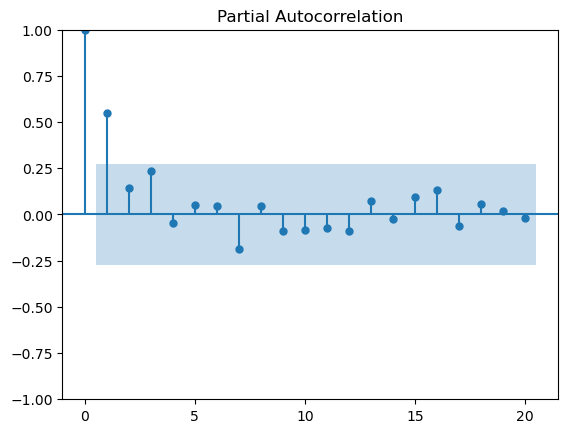

In [22]:
# Importing the partial autocorrelation function plot
from statsmodels.graphics.tsaplots import plot_pacf

#Checking for partial plot autocorrelation by week
plot_pacf(by_week['tips_driver_pay'].dropna(), lags = 20);

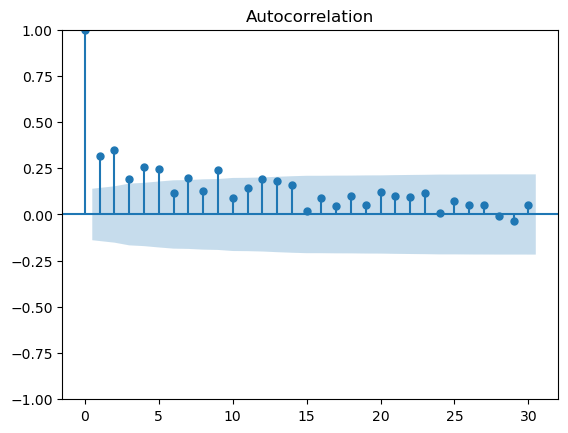

In [31]:
#Checking autocorrelation by day
plot_acf(by_day['tips_driver_pay'].dropna(), lags = 30);

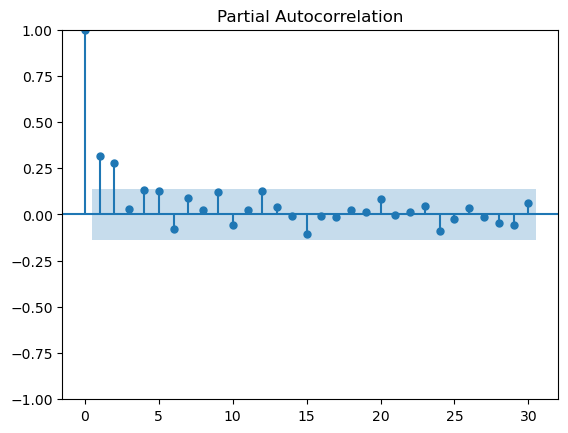

In [32]:
#Checking for partial plot autocorrelation by day
plot_pacf(by_day['tips_driver_pay'].dropna(), lags = 30);

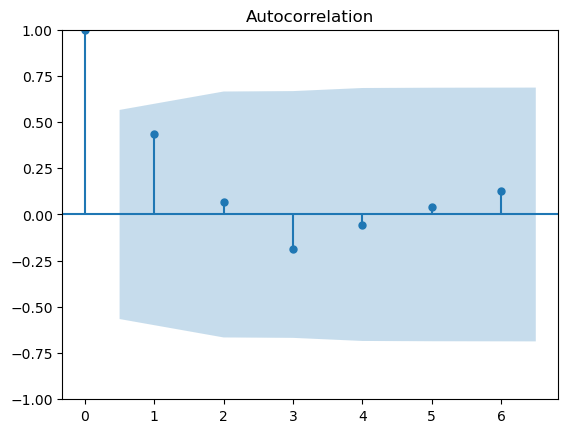

In [40]:
#Checking autocorrelation by day
plot_acf(by_month['tips_driver_pay'].dropna(), lags = 6);

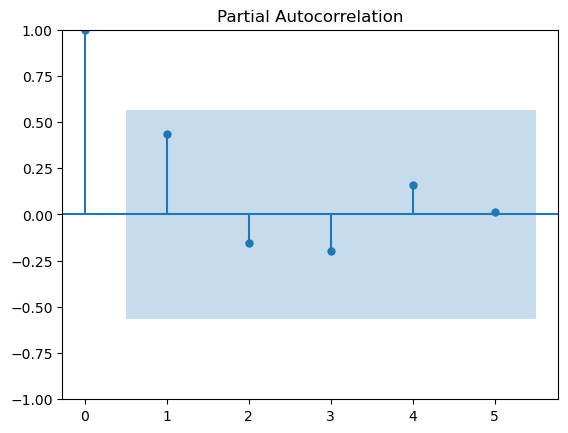

In [42]:
#Checking for partial plot autocorrelation by day
plot_pacf(by_month['tips_driver_pay'].dropna(), lags = 5);

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_11224/979598665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(most_spend, palette='Spectral');


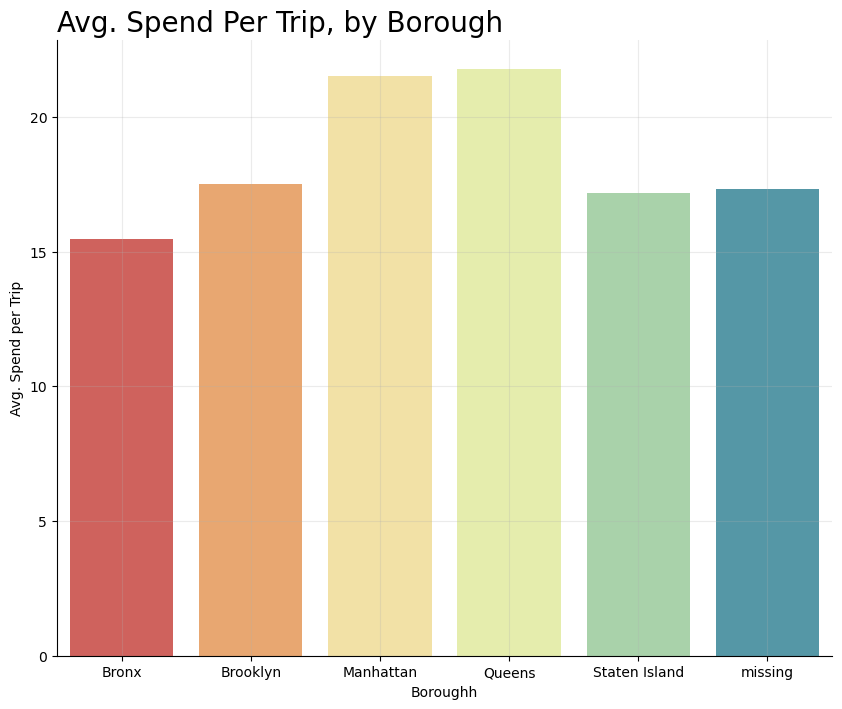

In [51]:
#Where are people spending the most on trips?

most_spend = df['tips_driver_pay'].groupby(df['borough_name']).mean()

plt.figure(figsize=(10, 8))
sns.color_palette("Spectral", as_cmap=True)
sns.barplot(most_spend, palette='Spectral');
plt.ylabel("Avg. Spend per Trip")
plt.xlabel("Borough")
plt.title("Avg. Spend Per Trip, by Borough", loc='left', fontsize=20);
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True);

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_11224/3044887284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['borough_name'], y=df['tips_driver_pay'], palette="Spectral",


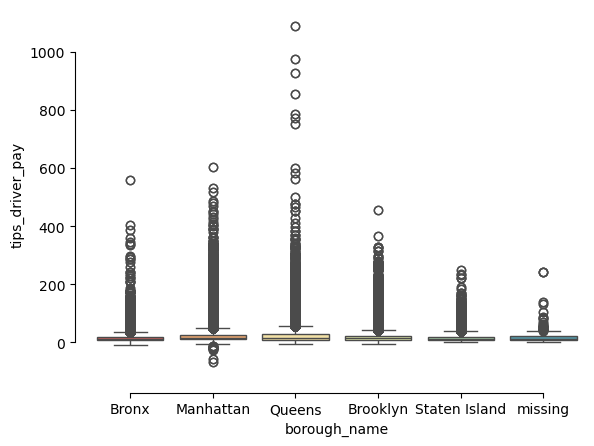

In [98]:
#Boxplot of spend by borough
sns.boxplot(x=df['borough_name'], y=df['tips_driver_pay'], palette="Spectral",
            data=df)
sns.despine(offset=10, trim=True)

In [96]:
outliers = df[df['tips_driver_pay'] >= 300.00]
outliers = pd.DataFrame(outliers)
outliers.head()

,PULocationID,DOLocationID,trip_miles,base_passenger_fare,tips,driver_pay,congestion_surcharge,req_time,req_date,pickup_time,dropoff_date,dropoff_time,temp,preciptype,zone,borough,tips_driver_pay,trip_duration,month,day,borough_name
req_index,,,,,,,,,,,,,,,,,,,,,
2022-01-06,261.0,265.0,56.390,350.25,72.15,253.80,0.00,17:04:18,2022-01-06,17:10:00,2022-01-06,18:43:00,38.2,3,World Trade Center,2,325.95,5580,1,6,Manhattan
2022-01-06,261.0,265.0,56.390,350.25,72.15,253.80,0.00,17:04:18,2022-01-06,17:10:00,2022-01-06,18:43:00,38.2,3,World Trade Center,2,325.95,5580,1,6,Manhattan
2022-01-18,227.0,265.0,137.916,333.52,0.00,323.13,0.00,15:46:40,2022-01-18,15:51:00,2022-01-18,18:40:00,33.4,0,Sunset Park East,4,323.13,10140,1,18,Brooklyn
2022-01-18,227.0,265.0,137.916,333.52,0.00,323.13,0.00,15:46:40,2022-01-18,15:51:00,2022-01-18,18:40:00,33.4,0,Sunset Park East,4,323.13,10140,1,18,Brooklyn
2022-01-28,230.0,132.0,55.430,648.42,0.00,468.37,2.75,12:23:43,2022-01-28,12:33:00,2022-01-28,17:35:00,31.3,3,Times Sq/Theatre District,2,468.37,18120,1,28,Manhattan


In [111]:
#Turning negative numbers to positive since drivers don't pay the passenger
df['tips_driver_pay'] = df['tips_driver_pay'].abs()
df['base_passenger_fare'] = df['base_passenger_fare'].abs()

In [113]:
no_outliers = df[df['tips_driver_pay'] < 50.00]
no_outliers = pd.DataFrame(no_outliers)

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_11224/2158301776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=no_outliers['borough_name'], y=no_outliers['tips_driver_pay'], palette="Spectral",


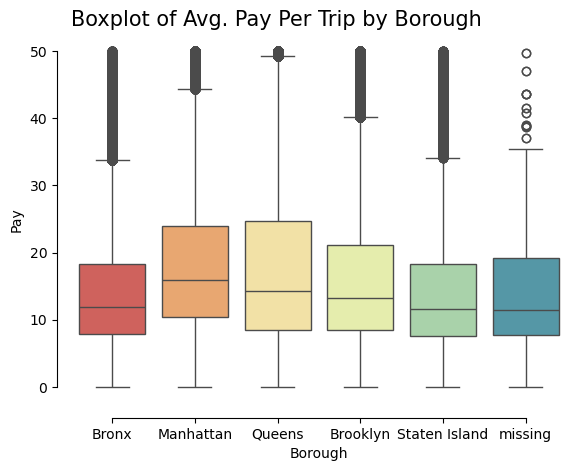

In [115]:
sns.boxplot(x=no_outliers['borough_name'], y=no_outliers['tips_driver_pay'], palette="Spectral",
            data=no_outliers)
sns.despine(offset=10, trim=True)
plt.title("Boxplot of Avg. Pay Per Trip by Borough", loc='left', fontsize=15)
plt.xlabel('Borough')
plt.ylabel('Pay');

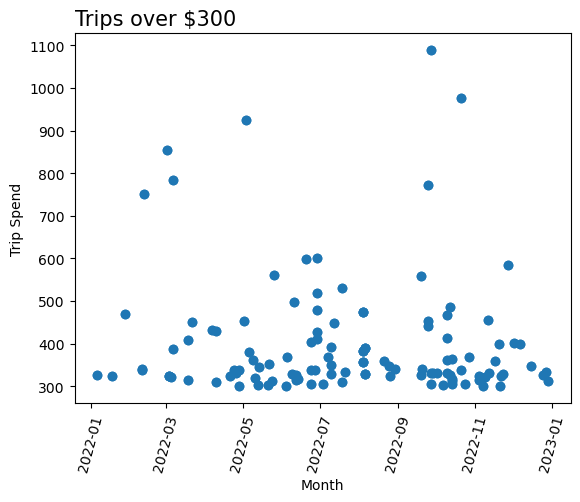

In [97]:
plt.scatter(x=outliers.index, y=outliers['tips_driver_pay']);
plt.title("Trips over $300", loc='left', fontsize=15)
plt.xlabel("Month")
plt.ylabel("Trip Spend")
plt.xticks(rotation=75);

In [69]:
#Where in Queens are people spending the most on a trip?
queens = df[df['borough_name'] == 'Queens']
queens_spend = queens['tips_driver_pay'].groupby(queens['zone']).mean().sort_values(ascending=False)

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_11224/1208568918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(queens_spend, palette='Spectral');


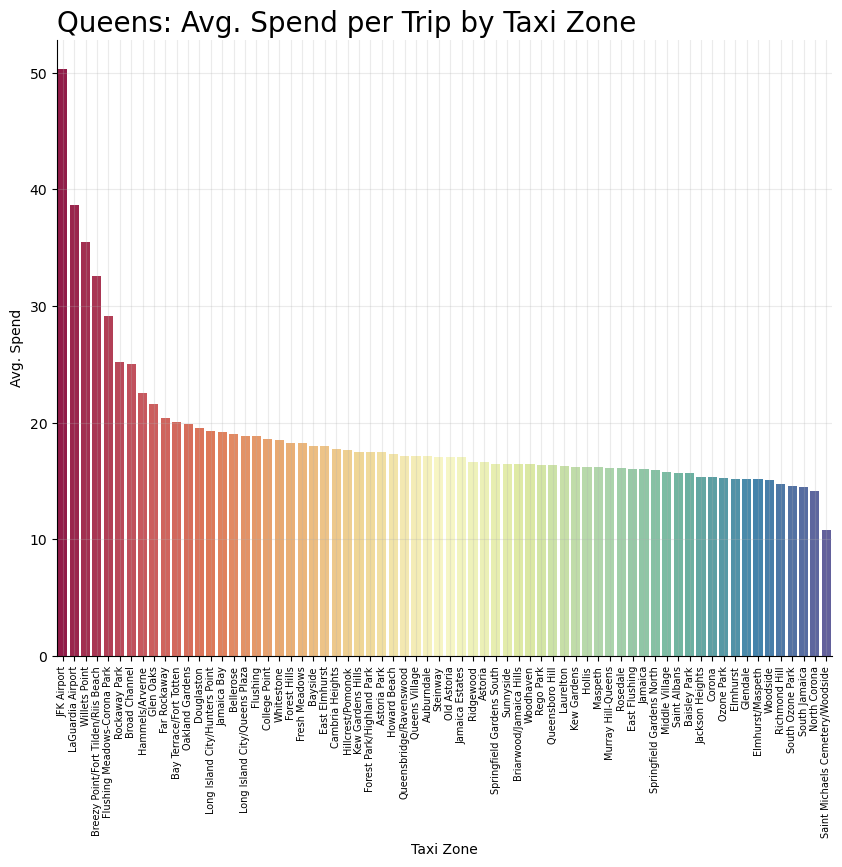

In [121]:
plt.figure(figsize=(10, 8))
sns.color_palette("Spectral", as_cmap=True)
sns.barplot(queens_spend, palette='Spectral');
plt.ylabel("Avg. Spend")
plt.xlabel("Taxi Zone")
plt.title("Queens: Avg. Spend per Trip by Taxi Zone", loc='left', fontsize=20);
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True)
plt.xticks(rotation=90, fontsize=7);

In [72]:
# Where in Manhattan are people spending the most on a trip?
manhat = df[df['borough_name'] == 'Manhattan']
manhat_spend = manhat['tips_driver_pay'].groupby(manhat['zone']).mean().sort_values(ascending=False)

/var/folders/1m/70vlnx9n73v__kwg38x_j79h0000gn/T/ipykernel_11224/3116383846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(manhat_spend, palette='Spectral');


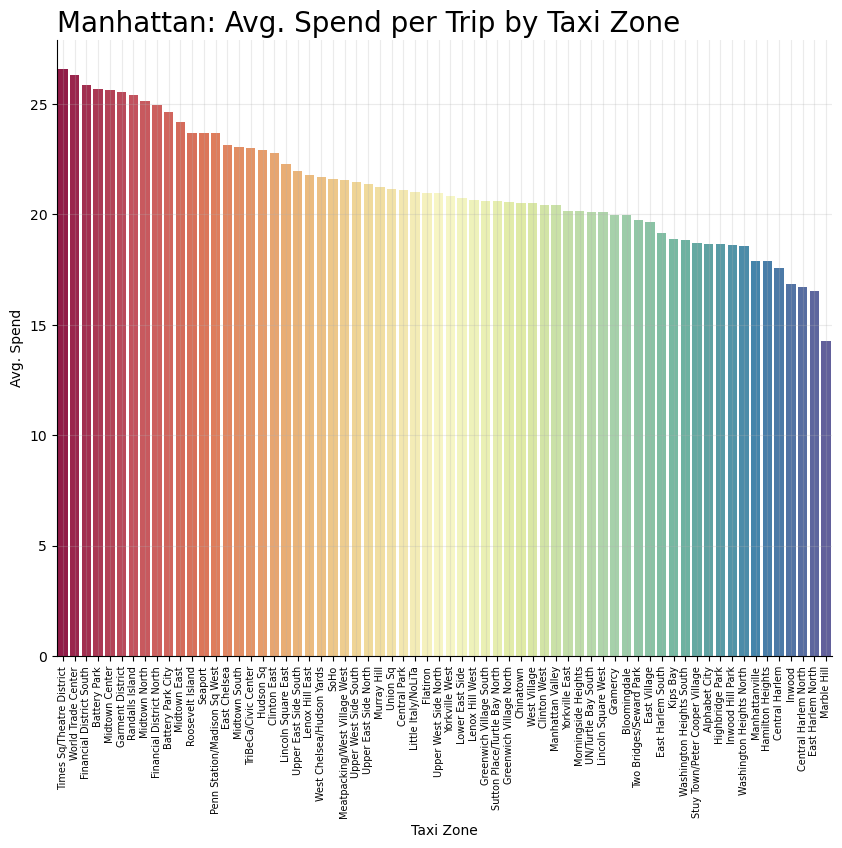

In [73]:
plt.figure(figsize=(10, 8))
sns.color_palette("Spectral", as_cmap=True)
sns.barplot(manhat_spend, palette='Spectral');
plt.ylabel("Avg. Spend")
plt.xlabel("Taxi Zone")
plt.title("Manhattan: Avg. Spend per Trip by Taxi Zone", loc='left', fontsize=20);
plt.grid(True, alpha=.25)
sns.despine(right=True, top=True)
plt.xticks(rotation=90, fontsize=7);